In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, Input, MaxPooling2D, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import librosa
import numpy as np
import os
import random


In [ ]:
random_file = "./blues.00000.wav"

<function matplotlib.pyplot.show(close=None, block=None)>

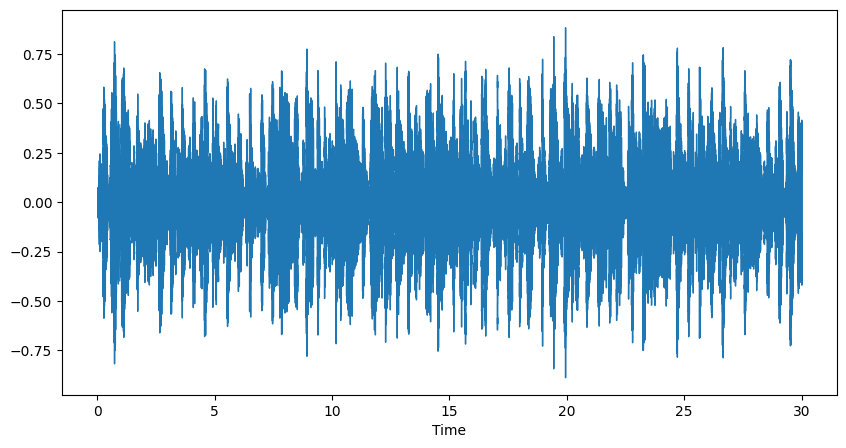

In [ ]:
x, sr = librosa.load(random_file)
plt.figure(figsize = (10,5))
librosa.display.waveshow(x, sr = sr)
plt.show

In [ ]:
from IPython.display import Audio
Audio(data = x , rate =sr)

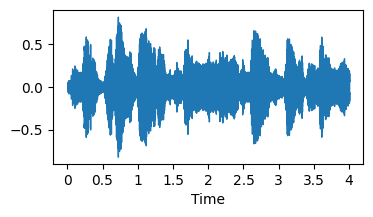

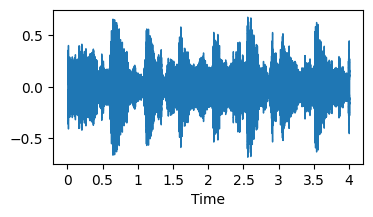

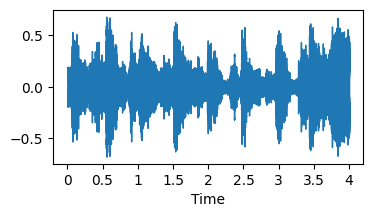

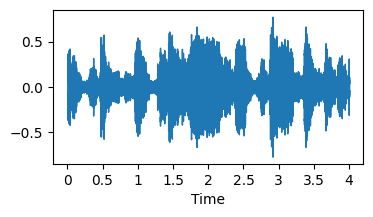

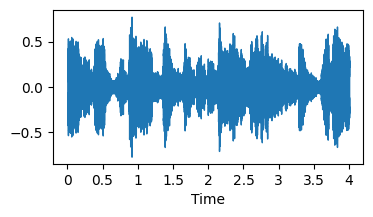

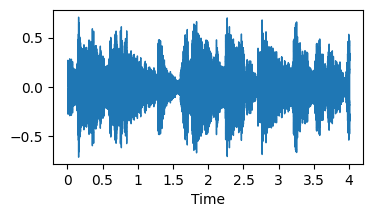

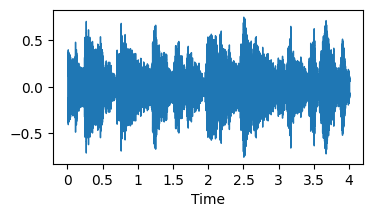

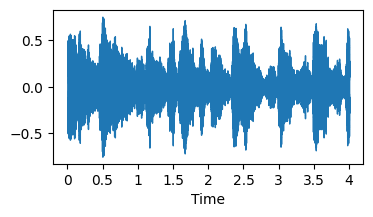

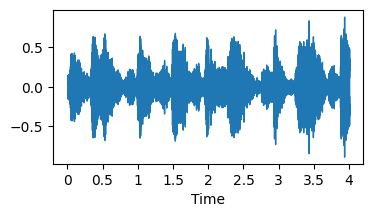

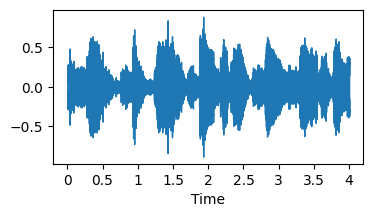

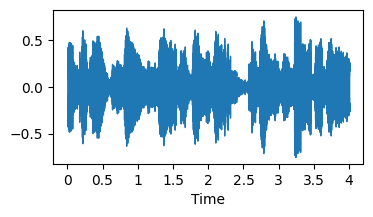

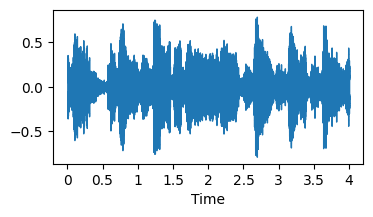

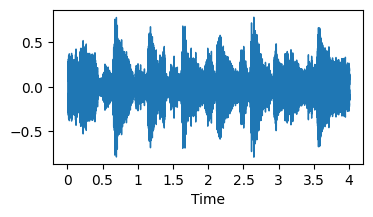

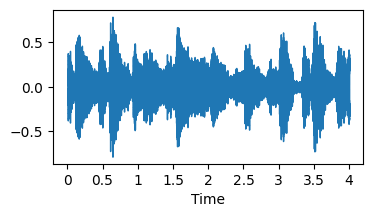

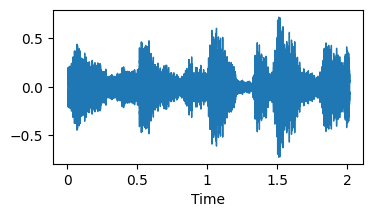

In [ ]:
audio_path = "./blues.00000.wav"
y,sr = librosa.load(audio_path, sr =None)

chunk_size = 4 #seconds
overlap_size = 2 #seconds

chunk_samples = sr * chunk_size
overlap_samples = sr * overlap_size

num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

for i in range(num_chunks):
    # Calculate start and end indices of the chunk
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples

    # Extract the chunk of audio
    chunk = y[start:end]
    plt.figure(figsize=(4, 2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()



# ***Melspectogram*** **Visualization**

In [ ]:
def plot_melspectrogram(y,sr):
    spectrogram = librosa.feature.melspectrogram(y = y, sr = sr)
    db_spectrogram = librosa.power_to_db(spectrogram, ref = np.max)
    plt.figure(figsize=(10,4))
    librosa.display.specshow(db_spectrogram, sr =sr, x_axis = 'time', y_axis = 'mel')
    plt.title('Spectrogram')
    plt.colorbar(format = '%+2.0f dB')
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_melspectrogram_chunks(y,sr):
  chunk_size = 4 #seconds
  overlap_size = 2 #seconds

  chunk_samples = sr * chunk_size
  overlap_samples = sr * overlap_size

  num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

  for i in range(num_chunks):
      # Calculate start and end indices of the chunk
      start = i * (chunk_samples - overlap_samples)
      end = start + chunk_samples

      # Extract the chunk of audio
      chunk = y[start:end]
      melspectrogram = librosa.feature.melspectrogram(y = chunk, sr =sr)
      print(melspectrogram.shape)
      db_melspectrogram = librosa.power_to_db(melspectrogram, ref = np.max)
      plt.figure(figsize=(10, 4))
      librosa.display.specshow(db_melspectrogram, sr=sr, x_axis = 'time', y_axis = 'mel')
      plt.title('Spectrogram')
      plt.colorbar(format = '%+2.0f dB')
      plt.tight_layout()
      plt.show()

(128, 173)


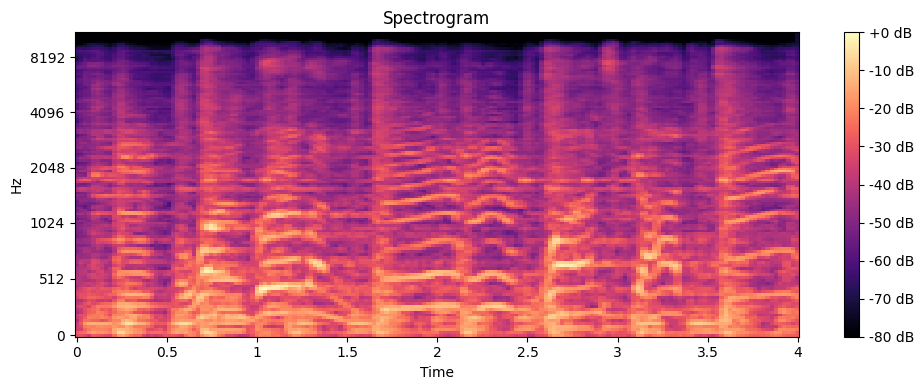

(128, 173)


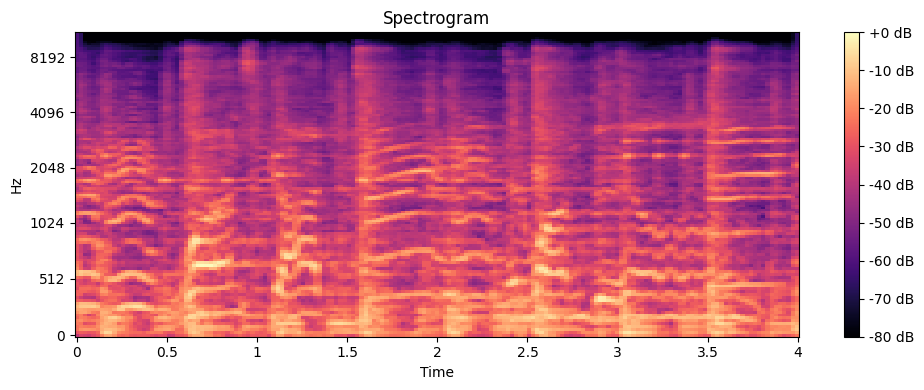

(128, 173)


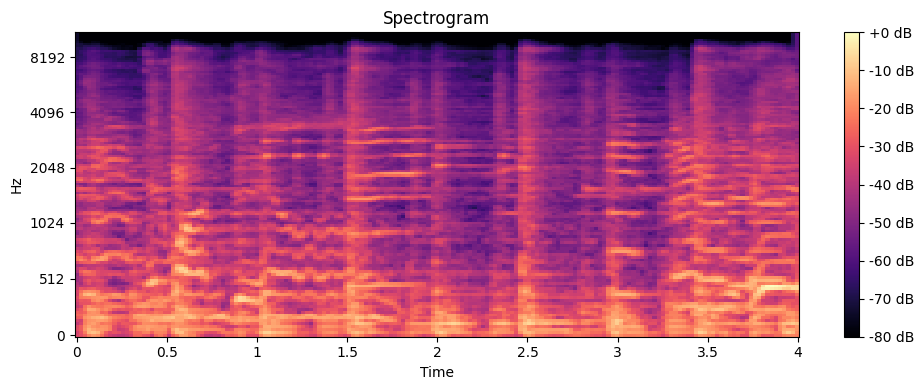

(128, 173)


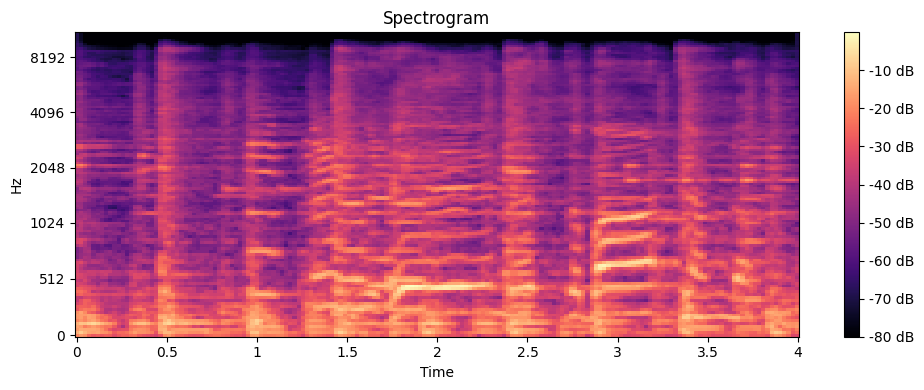

(128, 173)


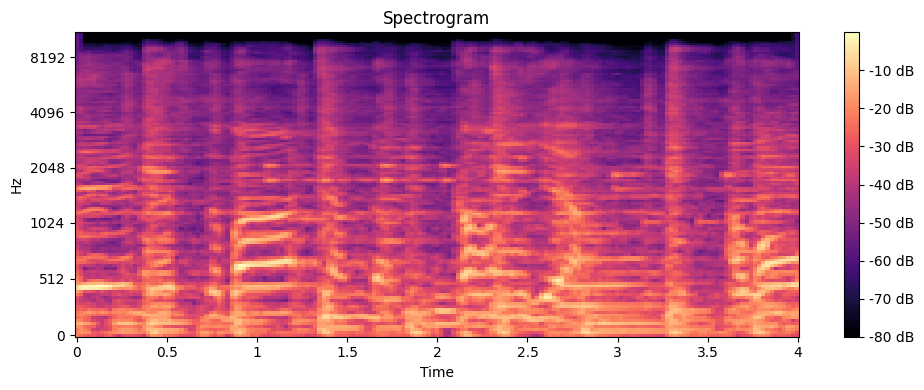

(128, 173)


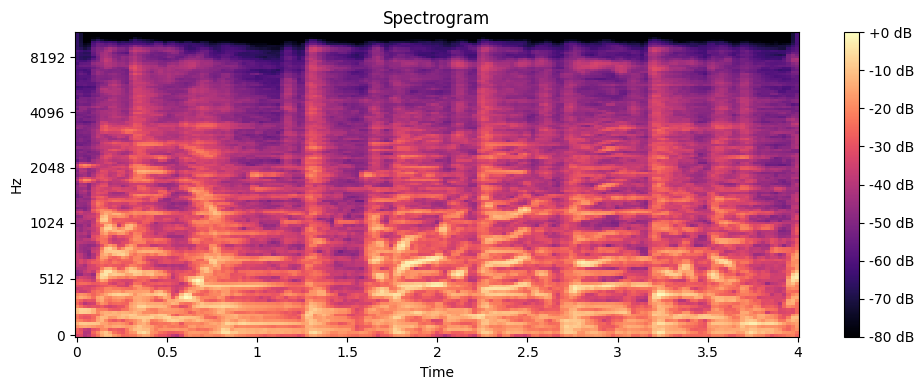

(128, 173)


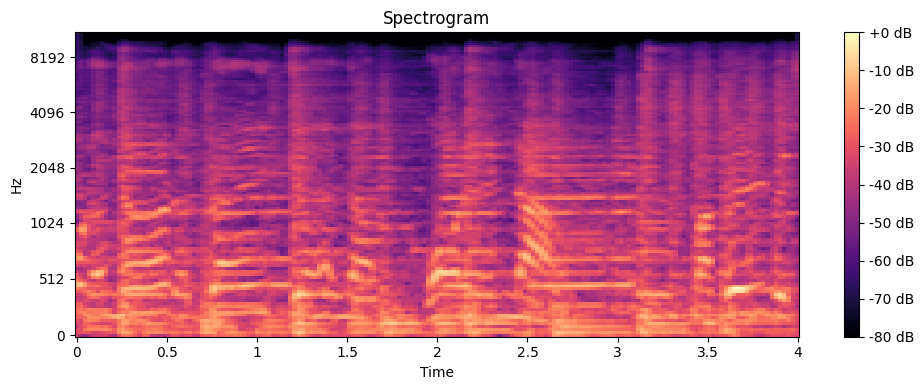

(128, 173)


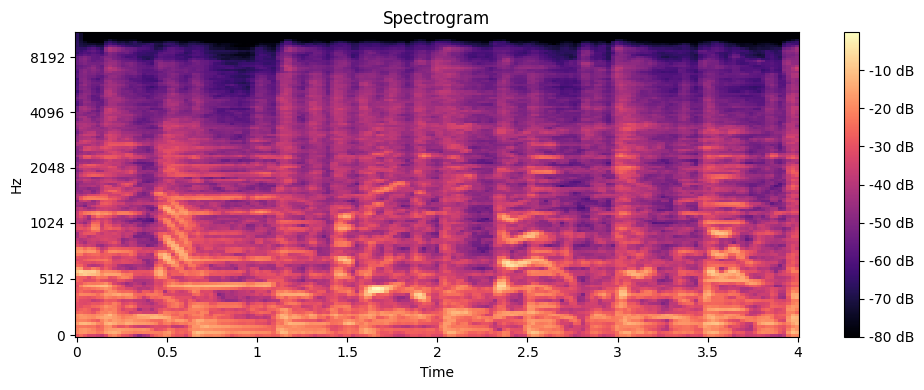

(128, 173)


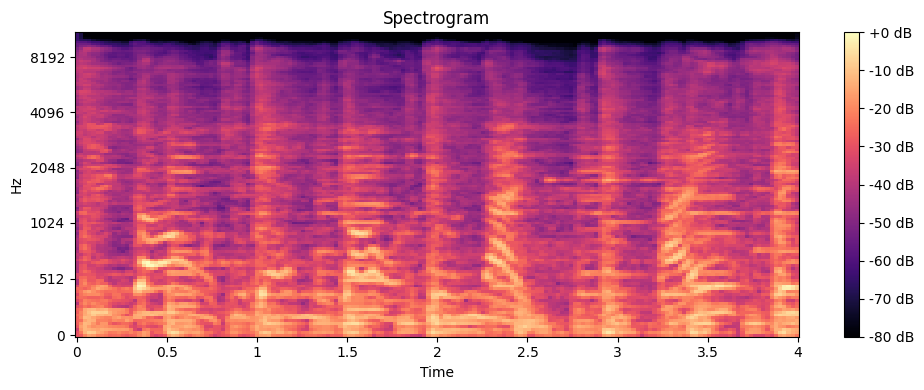

(128, 173)


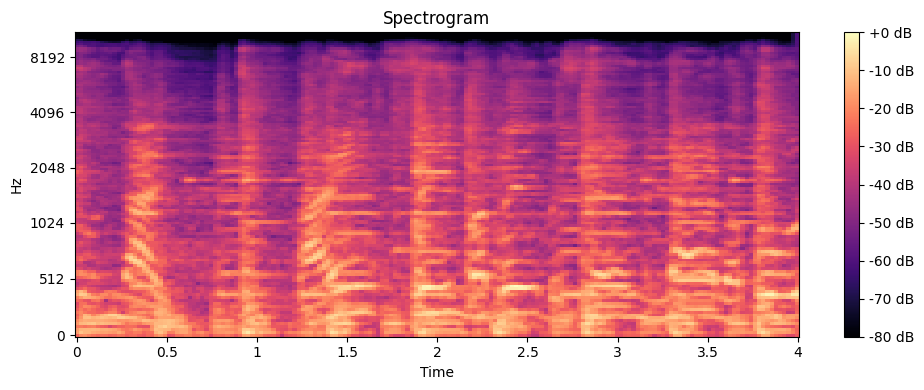

(128, 173)


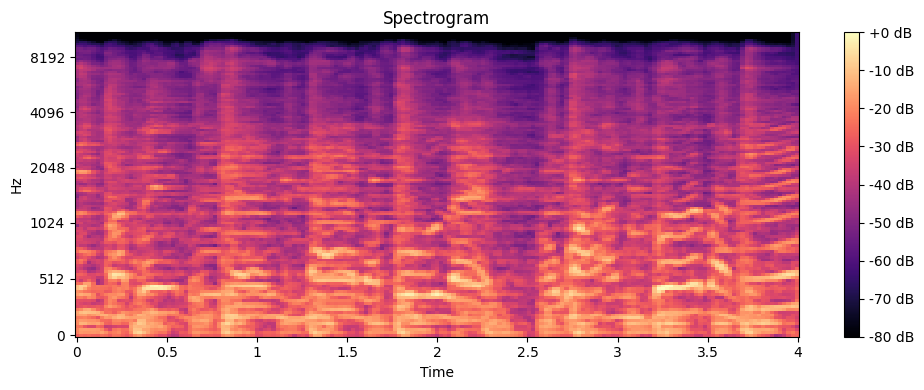

(128, 173)


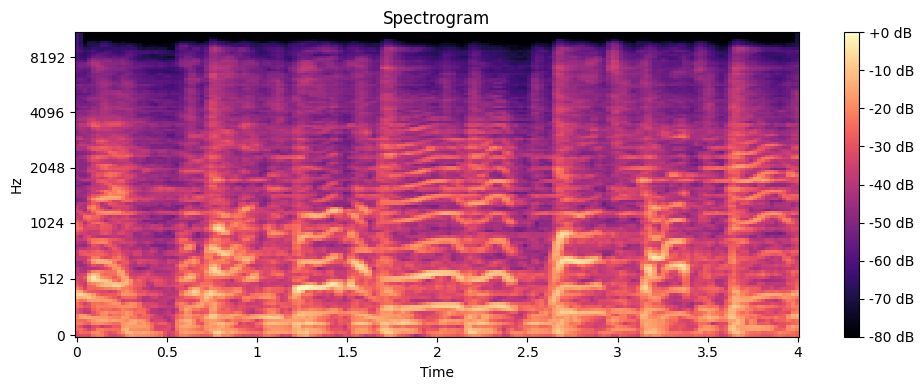

(128, 173)


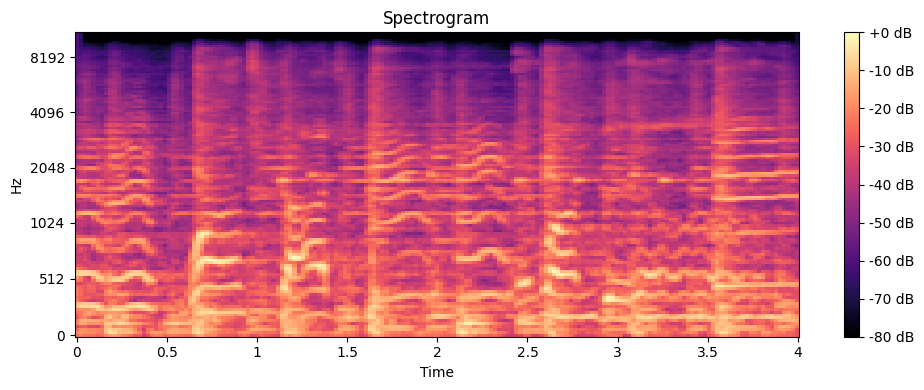

(128, 173)


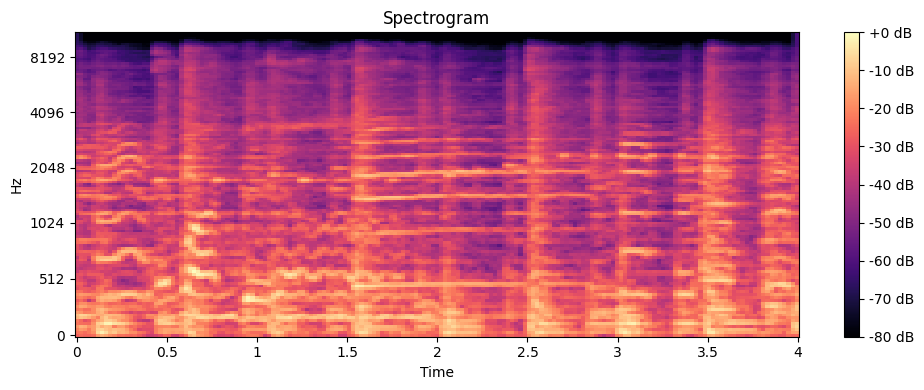

(128, 87)


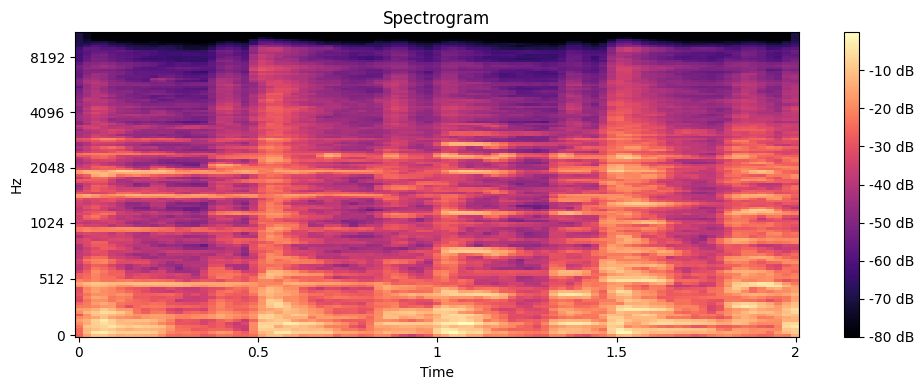

In [ ]:
plot_melspectrogram_chunks(y=x,sr=sr)

In [ ]:
data_dir = ""
classes = ['blues', 'classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [ ]:
def load_process_data(data_dir, classes, target_shape = (150,150), ):
  data= []
  labels = []
  for i_class, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    print('processing...', class_dir)
    for file_name in os.listdir(class_dir):
      if file_name.endswith('.wav'):
        file_path = os.path.join(class_dir, file_name)
        audio_data, sr = librosa.load(file_path, sr = None)
        chunk_duration = 4  # seconds
        overlap_duration = 2  # seconds

                # Convert durations to samples
        chunk_samples = chunk_duration * sr
        overlap_samples = overlap_duration * sr

                # Calculate the number of chunks
        num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
        for i in range(num_chunks):
            start = i * (chunk_samples - overlap_samples)
            end = start + chunk_samples
            chunk = audio_data[start:end]
            melspectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
            melspectrogram = resize(melspectrogram, target_shape)
            data.append(melspectrogram)
            labels.append(i_class)
  return np.array(data), np.array(labels)


In [ ]:
data, labels = load_process_data(data_dir, classes)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)


In [ ]:
i = Input(shape = X_train[0].shape)
x = Conv2D(32, (3,3), padding = 'same',activation = 'relu')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), padding = 'same',activation = 'relu')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), padding = 'same',activation = 'relu')(i)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), padding = 'same',activation = 'relu')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), padding = 'same',activation = 'relu')(i)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), padding = 'same',activation = 'relu')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation = 'softmax')(x)

model = Model(i,x)

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model_history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_test, y_test))


In [ ]:
model.save('Music_genre_classifier.h5')

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
# Precision Recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

# **Confusion Matrix**

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 10)
plt.ylabel('Actual Class',fontsize = 10)
plt.title('Music Genre Classification Confusion Matrix',fontsize = 15)
plt.show()